In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
# and will use scikit-learn & scipy

In [2]:
water = pd.read_csv('water_potability.csv')
water = water.sample(frac=1).reset_index(drop=True)
water.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.961721,224.316760,11551.215680,9.492074,367.466010,451.808446,14.911191,79.687039,2.286943,1
1,NaN,182.113946,21453.334662,6.667287,NaN,392.433377,15.464582,60.046065,5.036017,1
2,6.538084,197.428199,15979.060270,7.424945,273.719282,452.187233,18.584959,77.730814,5.143750,0
3,6.350290,190.383738,14905.393852,5.537830,NaN,446.840605,13.983567,67.817096,4.265233,1
4,2.376768,129.863973,11684.111637,9.974808,301.429747,503.910390,8.741258,76.310695,3.629218,0


Handling missing data by simply dropping the samples with any NaN value

In [3]:
water.dropna(axis=0, inplace=True)

Now I will reserve some part of the data as test set to use it in final evaluation 

In [4]:
from sklearn.model_selection import train_test_split
water_data = water.drop('Potability', axis=1)
water_label = water.Potability
X_train, X_test, y_train, y_test = train_test_split(water_data, water_label, test_size=0.33, random_state=0)
data = pd.concat([X_train, y_train], axis=1)
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
354,9.567823,173.111498,38787.462705,5.150000,444.970552,492.411524,12.904221,48.481477,4.197919,1
33,6.669532,190.751165,16246.173191,6.372975,324.341893,383.245825,7.852086,86.440561,1.964863,0
1857,6.037428,227.033994,12988.791229,8.476905,392.380529,306.386283,7.122391,41.190507,3.594217,1
582,4.495358,234.191916,14080.833709,6.340682,296.314220,382.408074,17.353545,59.004349,4.962900,0
2756,6.427721,166.850237,12215.409083,7.696751,376.282617,352.745370,20.130483,66.735044,2.904453,1
...,...,...,...,...,...,...,...,...,...,...
1320,7.635265,205.067631,17796.374638,7.156738,306.800286,370.561027,17.486815,32.920720,3.948304,1
1943,6.448931,240.244771,13979.165723,9.077985,314.590477,473.751302,17.416903,84.024786,3.622196,1
2685,6.953372,203.146547,11609.109055,5.495738,304.283193,551.143337,9.387781,55.958006,3.651866,0
910,7.156424,197.993538,27025.206963,6.734527,359.710517,448.457161,12.511973,49.299849,2.958415,1


<h2>Exploratory Data Analysis</h2>

In [5]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000
mean,7.081271,196.191597,21886.329430,7.103009,332.418483,428.120406,14.347330,66.336750,3.985742,0.400148
std,1.570291,31.839478,8681.607858,1.616781,41.881129,81.549669,3.351639,16.098349,0.773274,0.490110
min,0.989912,94.091307,320.942611,1.920271,129.000000,201.619737,4.371899,8.577013,1.450000,0.000000
25%,6.125329,176.744938,15573.028778,6.049913,307.460124,368.038744,12.096586,56.329140,3.444735,0.000000
50%,7.016836,197.287207,20769.519636,7.101224,331.834632,424.251162,14.289320,66.553465,3.977362,0.000000
75%,8.013850,216.119231,27207.167666,8.097415,358.441954,487.151040,16.612853,77.061049,4.525794,1.000000
max,14.000000,317.338124,56488.672413,13.127000,481.030642,753.342620,27.006707,120.030077,6.494749,1.000000


Features are on very different scales

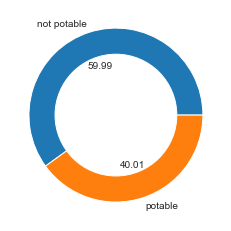

In [6]:
plt.pie(data.Potability.value_counts(), labels=['not potable','potable'], autopct='%.2f')
white_circle = plt.Circle( (0,0), 0.7, color='white')
plt.gcf().gca().add_artist(white_circle)

Class distribution is skewed

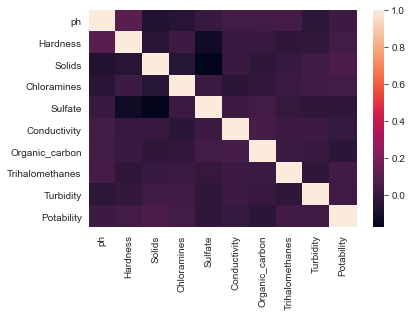

In [7]:
corr = data.corr()
sns.heatmap(corr)

Features have bad linear relationships, meaning that linear models won't help much

Now we will see how features distribute to per class.

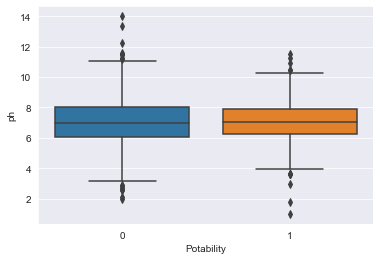

In [8]:
sns.boxplot(data=data, x='Potability', y='ph')

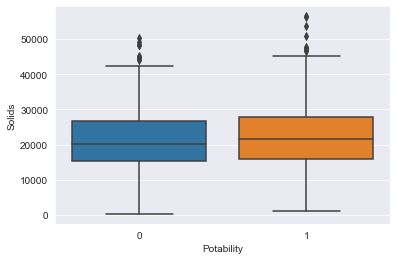

In [9]:
sns.boxplot(data=data, x='Potability', y='Solids')

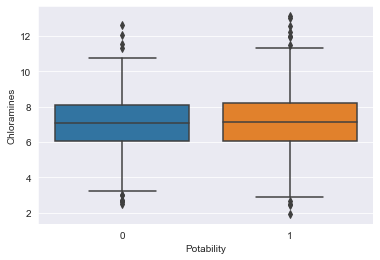

In [10]:
sns.boxplot(data=data, x='Potability', y='Chloramines')

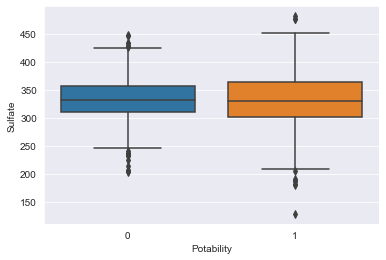

In [11]:
sns.boxplot(data=data, x='Potability', y='Sulfate')

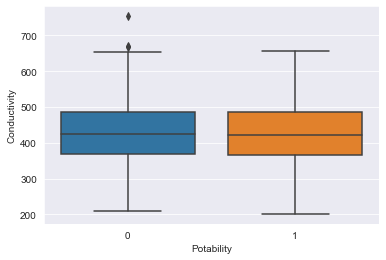

In [12]:
sns.boxplot(data=data, x='Potability', y='Conductivity')

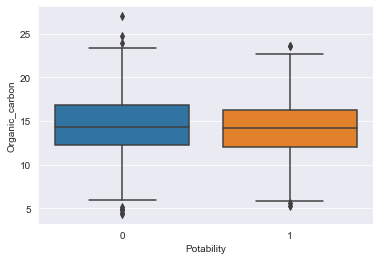

In [13]:
sns.boxplot(data=data, x='Potability', y='Organic_carbon')

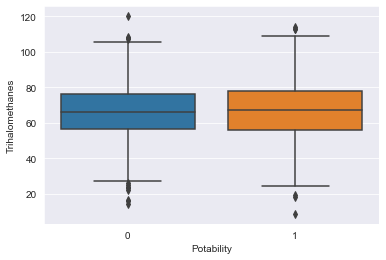

In [14]:
sns.boxplot(data=data, x='Potability', y='Trihalomethanes')

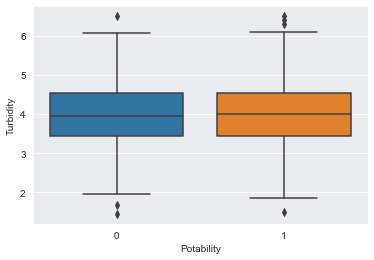

In [15]:
sns.boxplot(data=data, x='Potability', y='Turbidity')

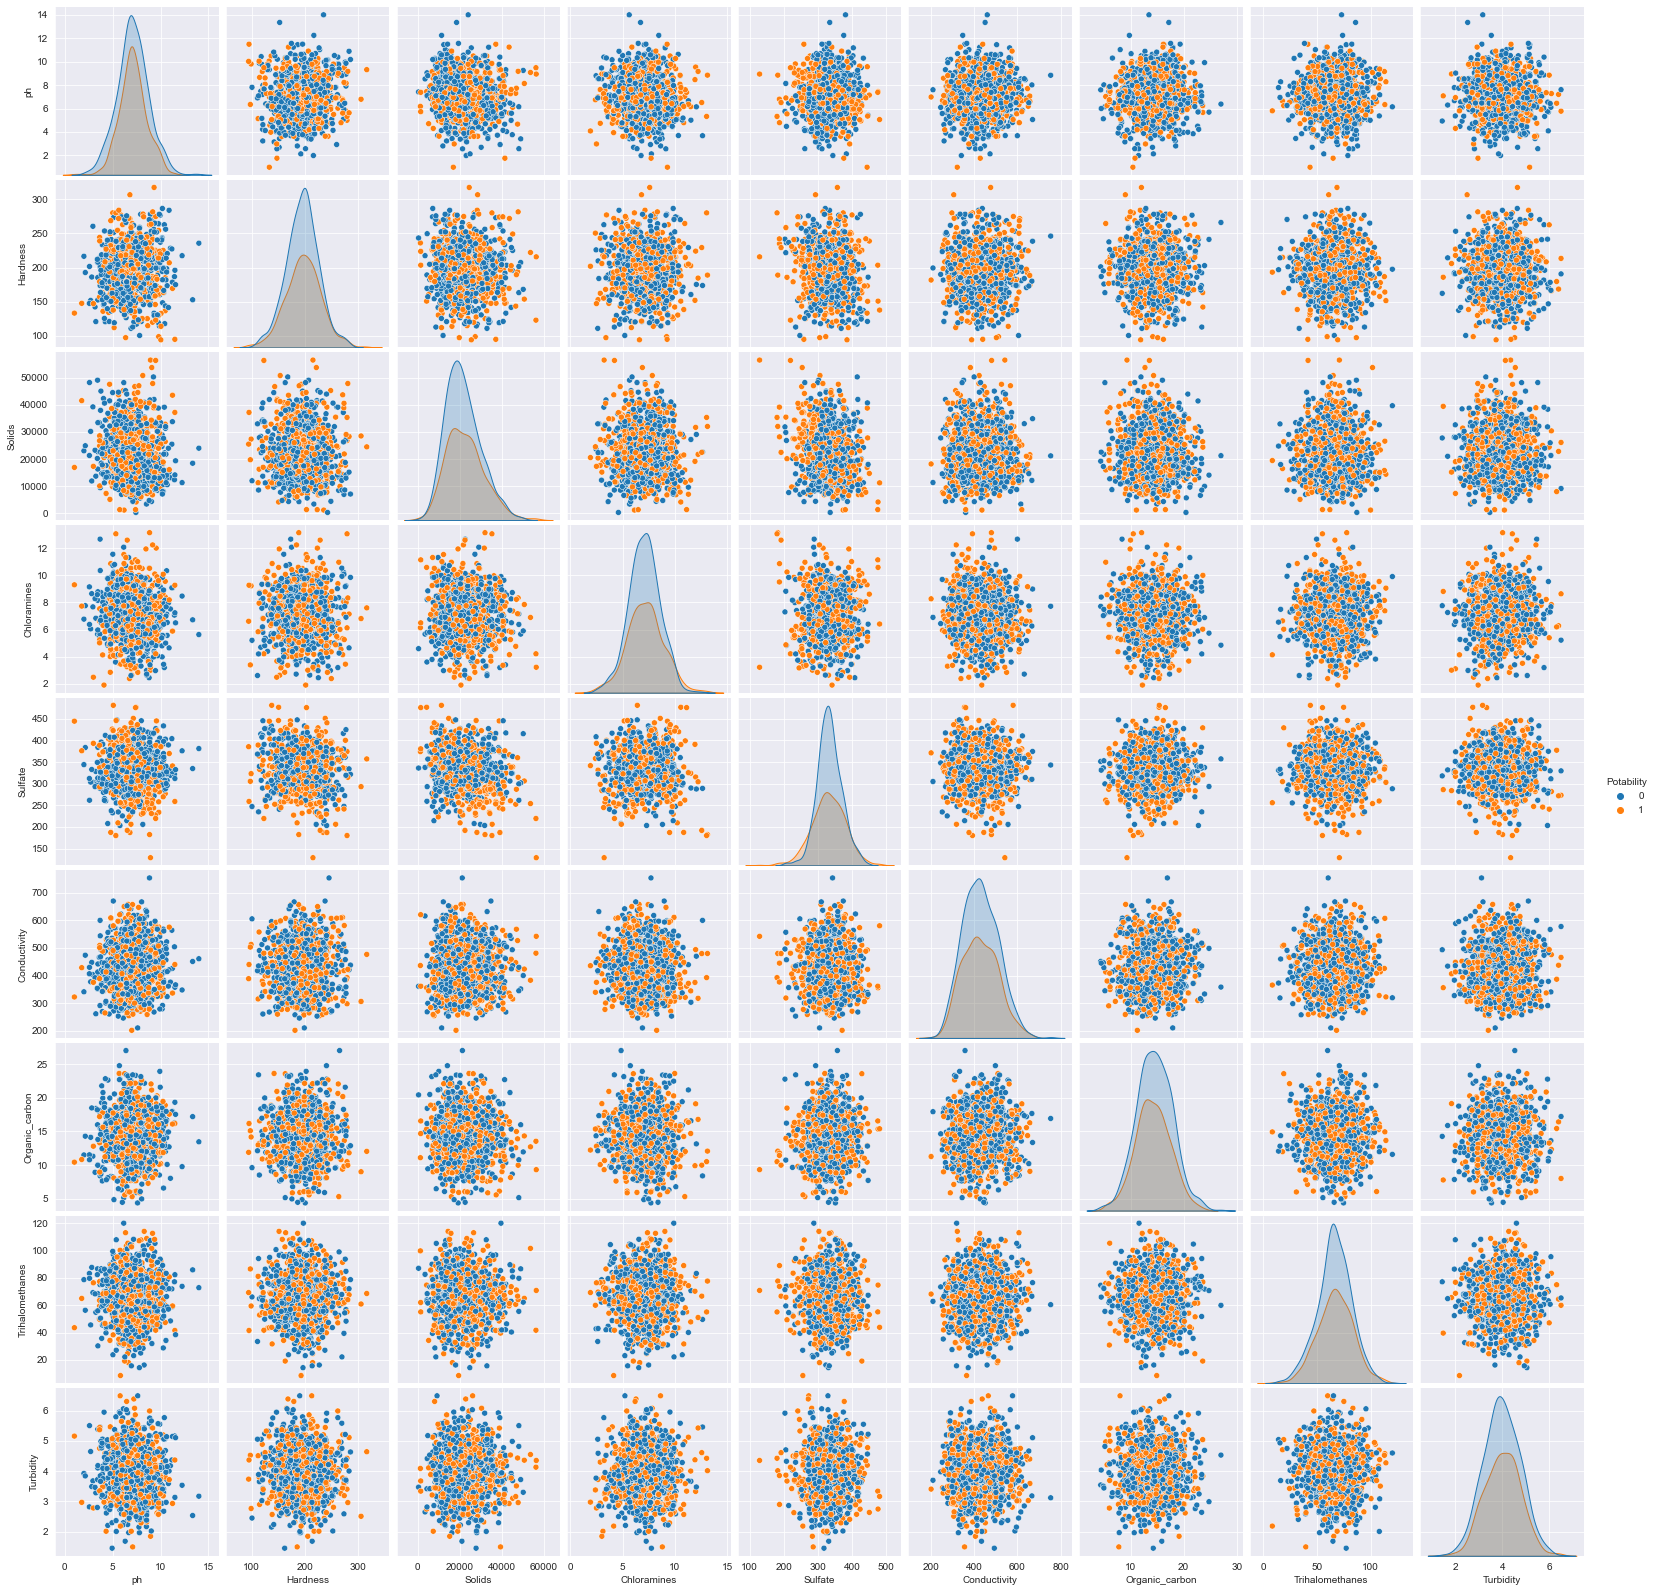

In [16]:
sns.pairplot(data = data, hue='Potability')

Differences in plots at the diagonal indicate these features' help to distinguish between classes

<h2>Feature Engineering</h2>

In [17]:
from scipy.stats import skew
skew(data.drop('Potability', axis=1)), data.columns

(array([ 0.06564668,  0.00513   ,  0.60363621,  0.06975564, -0.14340667,
         0.25405383,  0.06641918, -0.11494185,  0.01247129]),
 Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
        'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
       dtype='object'))

Let's see notable skews. As most models work better with features with normal distribution, we may try to reduce these values

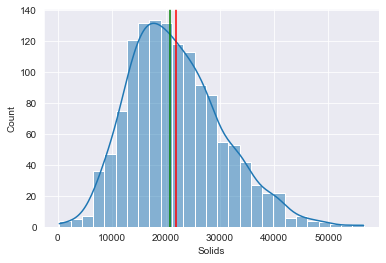

In [18]:
hist_solids = sns.histplot(data=data,x='Solids', kde=True)
hist_solids.axvline(data.Solids.mean(), color='red') # mean
hist_solids.axvline(data.Solids.median(), color='green') # median

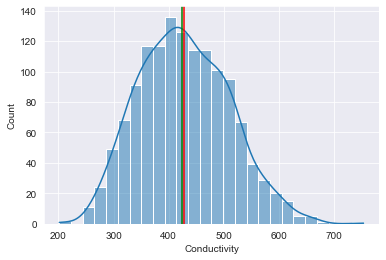

In [19]:
hist_solids = sns.histplot(data=data,x='Conductivity', kde=True)
hist_solids.axvline(data.Conductivity.mean(), color='red') # mean
hist_solids.axvline(data.Conductivity.median(), color='green') # median

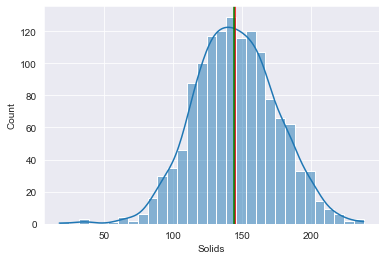

In [20]:
data.Solids = data.Solids**(1/2)
hist_solids = sns.histplot(data=data,x='Solids', kde=True)
hist_solids.axvline(data.Solids.mean(), color='red') # mean
hist_solids.axvline(data.Solids.median(), color='green') # median

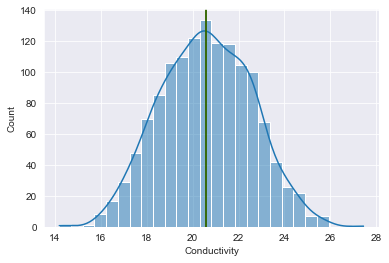

In [21]:
data.Conductivity = data.Conductivity**(1/2)
hist_solids = sns.histplot(data=data,x='Conductivity', kde=True)
hist_solids.axvline(data.Conductivity.mean(), color='red') # mean
hist_solids.axvline(data.Conductivity.median(), color='green') # median

In [22]:
skew(data.drop('Potability', axis=1))

array([ 0.06564668,  0.00513   , -0.04069884,  0.06975564, -0.14340667,
        0.01752238,  0.06641918, -0.11494185,  0.01247129])

Skewness of Solids and Conductivity reduced

In [23]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000
mean,7.081271,196.191597,144.925867,7.103009,332.418483,20.596734,14.347330,66.336750,3.985742,0.400148
std,1.570291,31.839478,29.723365,1.616781,41.881129,1.974296,3.351639,16.098349,0.773274,0.490110
min,0.989912,94.091307,17.914871,1.920271,129.000000,14.199286,4.371899,8.577013,1.450000,0.000000
25%,6.125329,176.744938,124.791903,6.049913,307.460124,19.184336,12.096586,56.329140,3.444735,0.000000
50%,7.016836,197.287207,144.116341,7.101224,331.834632,20.597358,14.289320,66.553465,3.977362,0.000000
75%,8.013850,216.119231,164.945952,8.097415,358.441954,22.071498,16.612853,77.061049,4.525794,1.000000
max,14.000000,317.338124,237.673458,13.127000,481.030642,27.447088,27.006707,120.030077,6.494749,1.000000


Data is still not scaled. Now, creating data matrix and target vector to build models:

In [24]:
X_train = data.drop('Potability', axis=1).to_numpy()
y_train = data.Potability.to_numpy()

Before building powerful models, let's see an example to linear models that can't learn this data

In [25]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)

In [26]:
from sklearn.metrics import classification_report, f1_score
cr_logreg = classification_report(y_test, pred_logreg, target_names=['not-potable','potable'], output_dict=True)
cr_logreg_dataframe = pd.DataFrame(cr_logreg).transpose()
cr_logreg_dataframe

C:\Users\tlgru\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
not-potable,0.000000,0.000000,0.000000,392.000000
potable,0.409639,1.000000,0.581197,272.000000
accuracy,0.409639,0.409639,0.409639,0.409639
macro avg,0.204819,0.500000,0.290598,664.000000
weighted avg,0.167804,0.409639,0.238081,664.000000


<h2>Building Models & Hyper-parameter Tuning</h2>

<h3>Random Forest</h3>

Random forest doesn't need scaling of the data

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
param_grid_rf = {'max_features': ['auto','sqrt','log2'], 'n_estimators': [100, 300, 1000]}
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf)
grid_rf.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 300, 1000]})

Retrained model:

In [28]:
optimised_rf = grid_rf.best_estimator_

Final evaluation: Classification report for optimised random forest:

In [29]:
pred_optimised_rf = optimised_rf.predict(X_test)
cr_optimised_rf = classification_report(y_test, pred_optimised_rf, target_names = ['not potable','potable'], output_dict = True)
cr_optimised_rf_dataframe = pd.DataFrame(cr_optimised_rf).transpose()
cr_optimised_rf_dataframe

,precision,recall,f1-score,support
not potable,0.695455,0.390306,0.500000,392.000000
potable,0.461712,0.753676,0.572626,272.000000
accuracy,0.539157,0.539157,0.539157,0.539157
macro avg,0.578583,0.571991,0.536313,664.000000
weighted avg,0.599704,0.539157,0.529750,664.000000


<h3>Support Vector Machine</h3>

In [30]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

We will handle preprocessing with a pipeline

In [31]:
pipe_svm = Pipeline([('scaler', MinMaxScaler()), ('svm', SVC())])
param_grid_svm = {'svm__C': [0.001, 0.01, 0.1, 1, 10, 100], 'svm__gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

In [32]:
grid_svm = GridSearchCV(pipe_svm, param_grid_svm)
grid_svm.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('svm', SVC())]),
             param_grid={'svm__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'svm__gamma': [0.001, 0.01, 0.1, 1, 10, 100]})

Now, extracting retrained model and evaluating model with test set

In [33]:
grid_svm.best_params_

{'svm__C': 1, 'svm__gamma': 10}

In [34]:
optimised_svm = grid_svm.best_estimator_
pred_optimised_svm = optimised_svm.predict(X_test)
cr_optimised_svm = classification_report(y_test, pred_optimised_svm, target_names = ['not potable','potable'],
                                         output_dict = True)
cr_optimised_svm_dataframe = pd.DataFrame(cr_optimised_svm).transpose()
cr_optimised_svm_dataframe

C:\Users\tlgru\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
not potable,0.590361,1.000000,0.742424,392.000000
potable,0.000000,0.000000,0.000000,272.000000
accuracy,0.590361,0.590361,0.590361,0.590361
macro avg,0.295181,0.500000,0.371212,664.000000
weighted avg,0.348527,0.590361,0.438299,664.000000


In [35]:
pred_optimised_svm

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Looks like SVM performs poorly. This is likely due to parameter C, it not being big enough and thus model being something close to a hyperplane: which won't work in our data with bad correlations.

In [36]:
param_grid_svm0 = {'svm__C': [0.001, 0.01, 0.1, 1, 10, 100, 10**6], 'svm__gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_svm0 = GridSearchCV(pipe_svm, param_grid_svm0)
grid_svm0.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('svm', SVC())]),
             param_grid={'svm__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000000],
                         'svm__gamma': [0.001, 0.01, 0.1, 1, 10, 100]})

In [37]:
optimised_svm0 = grid_svm0.best_estimator_
pred_optimised_svm0 = optimised_svm0.predict(X_test)
cr_optimised_svm0 = classification_report(y_test, pred_optimised_svm0, target_names = ['not potable','potable'],
                                         output_dict = True)
cr_optimised_svm_dataframe0 = pd.DataFrame(cr_optimised_svm0).transpose()
cr_optimised_svm_dataframe0

C:\Users\tlgru\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
not potable,0.590361,1.000000,0.742424,392.000000
potable,0.000000,0.000000,0.000000,272.000000
accuracy,0.590361,0.590361,0.590361,0.590361
macro avg,0.295181,0.500000,0.371212,664.000000
weighted avg,0.348527,0.590361,0.438299,664.000000


In [38]:
grid_svm0.best_params_

{'svm__C': 1, 'svm__gamma': 10}

Turns out to create a powerful model of particular data with support vector machine, we need large values for C parameter.  